Starting training...
Epoch 1, Loss: 0.4062
Epoch 2, Loss: 0.1971
Epoch 3, Loss: 0.1436
Epoch 4, Loss: 0.1131
Epoch 5, Loss: 0.0997
Epoch 6, Loss: 0.0880
Epoch 7, Loss: 0.0787
Epoch 8, Loss: 0.0692
Epoch 9, Loss: 0.0610
Epoch 10, Loss: 0.0587
Testing the model...
Test Accuracy: 97.31%
Visualizing predictions...


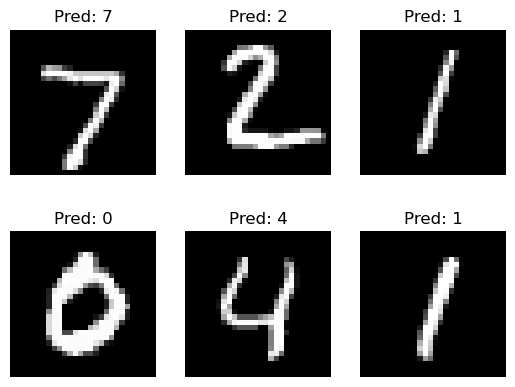

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1. Load and preprocess the MNIST dataset
# Transformations: Convert images to tensors and normalize pixel values
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load the training and testing datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders for batching
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the neural network
# A simple feedforward neural network with 3 layers
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 flattened to 784)
        self.fc2 = nn.Linear(128, 64)      # Hidden layer
        self.fc3 = nn.Linear(64, 10)       # Output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten 2D image to 1D vector
        x = F.relu(self.fc1(x))  # ReLU activation for the first layer
        x = F.relu(self.fc2(x))  # ReLU activation for the second layer
        x = self.fc3(x)          # Output layer (no activation for logits)
        return x

# Instantiate the model
model = MNISTClassifier()

# 3. Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for classification problems
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# 4. Train the model
print("Starting training...")
for epoch in range(10):  # Train for 10 epochs
    model.train()  # Set model to training mode
    running_loss = 0.0  # Track total loss for the epoch

    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Accumulate loss

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# 5. Test the model
print("Testing the model...")
correct = 0
total = 0
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)  # Total number of samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# 6. Visualize predictions
print("Visualizing predictions...")
# Get a batch of test images
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Get predictions for the batch
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display the first 6 images with their predictions
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].view(28, 28).numpy(), cmap='gray')
    plt.title(f"Pred: {predicted[i].item()}")
    plt.axis('off')
plt.show()
